<font color= 'blue'>In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this [article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. For example, if the actual value was 4.6, it rounded to 5.0 whics is supposed to be 4.5 . Even in some cases, he found out that a rating 4.1 movie was rounded to 5.0 . When he contaced the company, they said it might be because of bug in their rounded algorithm. To strengthen their opinion, the also said that their mobile app for the same website is giving right rounded rating and they are working on this issue.   

**We have two years data of movie rating by imd, rotten tomato, fandango etc before the email and after email. In this project what will try to figure out if they really solved the bug issue after getting emailed from Hickey.** </font>

To get the details about the columns for both file, please go to [this link](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) and [this link](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md)


<font color= 'red'>N.B: Although this project is partly done by data quest, an online learning platform, I have done an extension on their work to show the other site</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Data journalist Walt Hickey's analyzed data.**

In [2]:
before = pd.read_csv('fandango_score_comparison.csv')

In [3]:
pd.options.display.max_columns = 100             # to get all the columns

before.head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5


#### Firstly, we will work only on the fendago's data so let's truncate the dataset

In [4]:
before_f = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
before_f.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


#### We see that, this data set does not have seperate column for year. Let's fix this first.

In [5]:
before_f['year'] = before_f['FILM'].apply(lambda x: x[-5:-1])      # seperating the year from film column. 
before_f.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


**Data after Hickey sent them email**

In [6]:
after = pd.read_csv('movie_ratings_16_17.csv')
after.head(2)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.8,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.4,3.65,2.5,4.15,2.5,3.5,2.5,4.0


#### Firstly, we will work only on the fendago's data so let's truncate the dataset

In [7]:
after_f = after[['movie', 'year', 'fandango']].copy()
after_f.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [8]:
print('Data before email' + '\n' + '-------------------')
print(before_f.year.value_counts())
print('\n\n' + 'Data after email' + '\n' + '----------------------')
print(after_f.year.value_counts())

Data before email
-------------------
2015    129
2014     17
Name: year, dtype: int64


Data after email
----------------------
2016    191
2017     23
Name: year, dtype: int64


#### since there are few numbers of movie in 2014 and 2016 for two different data set, we could make two data set for the year 2015 and 2016.

In [9]:
before_f_in_2015 = before_f[before_f.year == '2015']

In [10]:
before_f_in_2015.year.value_counts()

2015    129
Name: year, dtype: int64

In [11]:
after_f_in_2016 = after_f[after_f.year == 2016]

In [12]:
after_f_in_2016.year.value_counts()

2016    191
Name: year, dtype: int64

**So far we have done is we cleaned the dataset to make it easily analyzable. Now we will try to compare the distribution of the movie rating on fandango website in 2015 and 2016**

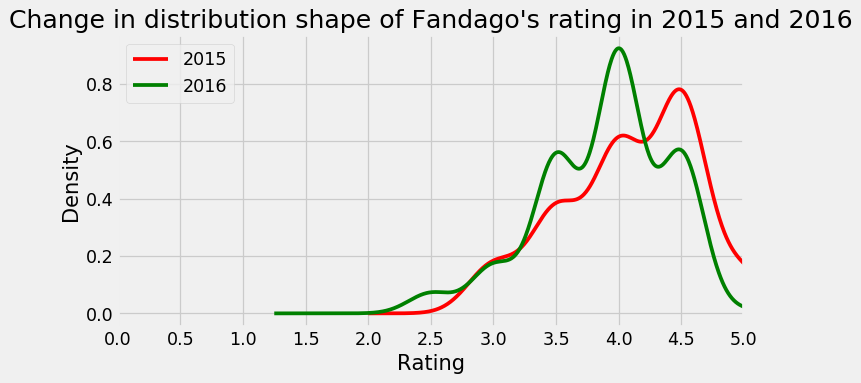

In [13]:
# figure style and size
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4), dpi= 90, linewidth= 3)

# plotting the graph
before_f_in_2015.Fandango_Stars.plot.kde(linewidth= 3, color= 'red', label= '2015', legend= True)
after_f_in_2016.fandango.plot.kde(linewidth= 3, color= 'green', label= '2016', legend= True)

# figure ornaments
plt.title("Change in distribution shape of Fandago's rating in 2015 and 2016")
plt.xlabel('Rating')
plt.xlim(0, 5)
plt.xticks(np.arange(0,5.5,.5))
plt.show()

<font color= 'green'>**Here, we see that the movie rating in 2015 was slightly higher than in 2016. It is clearly visible that there has been some changes. To make our argument more strong, we could look at some other factors too. Let's figure out the mean, median adn mode of the ratings.** </font>

# Off topic

To get more matplotlib background you could use the following code

In [14]:
import matplotlib.style as style
style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [15]:
print('Data before email' + '\n' + '-------------------')
before_f_in_2015.Fandango_Stars.value_counts(normalize= True).sort_index() * 100

Data before email
-------------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [16]:
print('Data after email' + '\n' + '-------------------')
after_f_in_2016.fandango.value_counts(normalize= True).sort_index() * 100

Data after email
-------------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

**<font color= 'green'>In 2016, around 7% of the movie were rated 5.0 and on the other hand only .5% in 2017. 37% of movies were rated 4.5 in 2016 comare to 24% in 2017. The percentage were low for other ratings as well. It also shows that changes have been made.</font>**

In [17]:
# mean of movie rating
mean_in_2015 = before_f_in_2015.Fandango_Stars.mean()
mean_in_2016 = after_f_in_2016.fandango.mean()

# median of movie rating
median_in_2015 = before_f_in_2015.Fandango_Stars.median()
median_in_2016 = after_f_in_2016.fandango.median()

# mdoe of movie rating
mode_in_2015 = before_f_in_2015.Fandango_Stars.mode()[0]           # mode comes with series
mode_in_2016 = after_f_in_2016.fandango.mode()[0]

In [18]:
# making a dataframe with those mean, median and mode
summary = pd.DataFrame(index= ['mean', 'median', 'mode'])

# assigning column
summary['2015'] = [mean_in_2015, median_in_2015, mode_in_2015]
summary['2016'] = [mean_in_2016, median_in_2016, mode_in_2016]

In [19]:
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


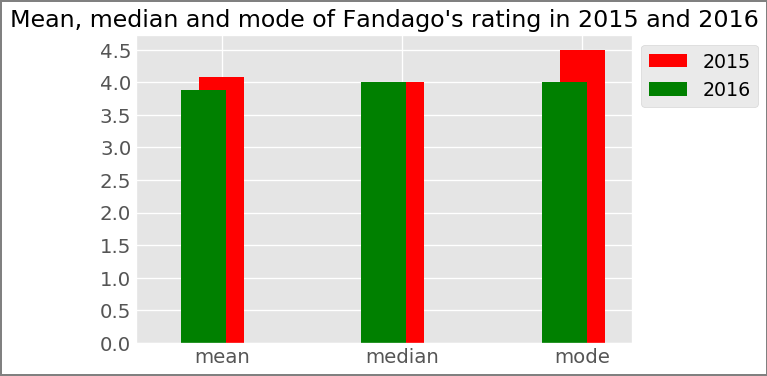

In [20]:
# figure style
plt.style.use('ggplot')
plt.figure(figsize=(6,4),dpi=95, linewidth= 3)

# plotting mean, median and mode
summary['2015'].plot.bar(color= 'red',label= '2015', legend= True, width= .25)
summary['2016'].plot.bar(color='green',label= '2016', legend= True, position= .9, rot= 0, width= .25, fontsize= 15)

# setting ornaments
plt.yticks(np.arange(0,5,.5))
plt.title("Mean, median and mode of Fandago's rating in 2015 and 2016", fontsize= 18)
plt.legend(bbox_to_anchor= (1,1), fontsize= 'x-large')         # legend position. 
plt.show()

**<font color= 'green'>We see that there is a major change in mean and median which clearly tells the difference in two years. </font>**

<font color= 'green'>**After the observation till now we can conclude about being changed in fandago's rating system but we cannot tell for sure that this change happened in the right direction. There might be other reason for the changes in distribution and the mean, median**
-  **Case one: Most of the released movies in 2015 might be good one than in 2016 and that is why year 2015 have higher rating in the distribution as well as in the mean median.**
-  **Case two: Fandango might not have fixed their bug issues. The scenario could be like: in 2015 the actual rating for a movie was 4.6 but it rounded to 5 so the website shows higher rating, in 2016 the actual rating could also be something like 4.1 and it rounded to 4.5. So the mean or distribution in rating might be changing but not their rounding algorithm which is still dubious.**</font>

<font color= 'blue'>To get rid of this confusion, at first, we need to make sure that whether the movie rating pattern were similar for other rating website or not (for example, rotten tomatoes, imdb which are widely accepted movie rating website). If we see the pattern are similar for those website in 2015 and 2016 we could assume that Fandago have changed their bug algorithm. </font>

In [21]:
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [22]:
before['year'] = before['FILM'].apply(lambda x: x[-5:-1])      # seperating the year from film column. 
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5,2015
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5,2015
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5,2015


In [23]:
# Truncating the data set and taking rotten tomato and imdb user rating

before_others_in_2015 = before[before.year == '2015'][['FILM','year','RT_user_norm_round','IMDB_norm_round']].copy()

In [24]:
before_others_in_2015.head()

,FILM,year,RT_user_norm_round,IMDB_norm_round
0,Avengers: Age of Ultron (2015),2015,4.5,4.0
1,Cinderella (2015),2015,4.0,3.5
2,Ant-Man (2015),2015,4.5,4.0
3,Do You Believe? (2015),2015,4.0,2.5
4,Hot Tub Time Machine 2 (2015),2015,1.5,2.5


In [25]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [26]:
after_others_in_2016 = after[after.year == 2016][['year','nr_imdb','nr_audience']].copy()
after_others_in_2016.head()

,year,nr_imdb,nr_audience
0,2016,3.5,4.0
1,2016,3.5,4.0
2,2016,3.5,2.5
4,2016,3.0,3.0
5,2016,4.0,4.0


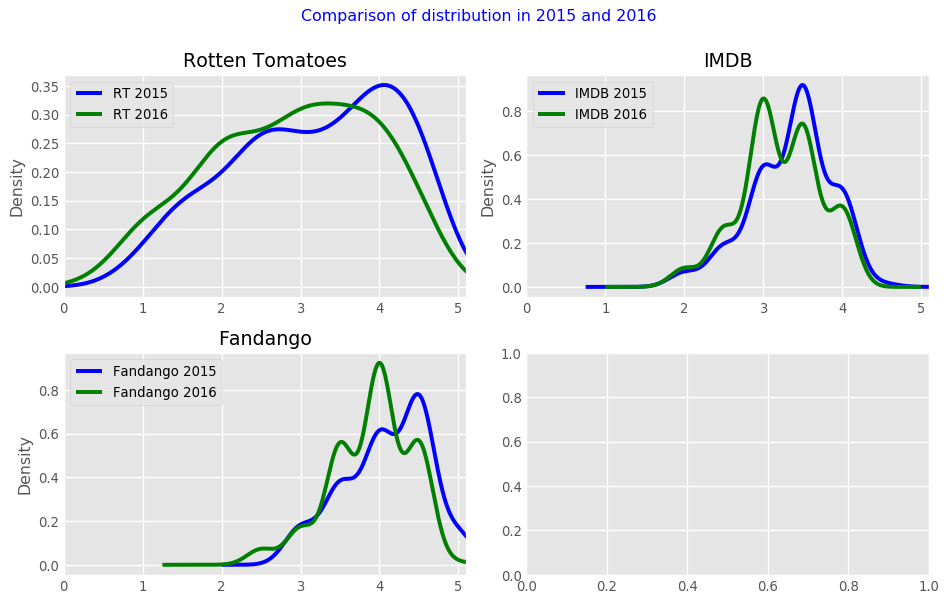

In [27]:
# figure style and subplot
plt.style.use('ggplot')
fig, ax = plt.subplots(2, 2, figsize=(10, 6), dpi= 95)
fig.suptitle('Comparison of distribution in 2015 and 2016', y=1.05, color= 'blue')

# plotting rotten tomatoes distribution
before_others_in_2015.RT_user_norm_round.plot.kde(linewidth= 3, color= 'blue', label= 'RT 2015', legend= True, ax= ax[0][0])
after_others_in_2016.nr_audience.plot.kde(linewidth= 3, color= 'green', label= 'RT 2016', legend= True, ax= ax[0][0])

# plotting IMDB distribution
before_others_in_2015.IMDB_norm_round.plot.kde(linewidth= 3, color= 'blue', label= 'IMDB 2015', legend= True, ax= ax[0][1])
after_others_in_2016.nr_imdb.plot.kde(linewidth= 3, color= 'green', label= 'IMDB 2016', legend= True, ax= ax[0][1])

# plotting fandango distribution
before_f_in_2015.Fandango_Stars.plot.kde(linewidth= 3, color= 'blue', label= 'Fandango 2015', legend= True, ax= ax[1][0])
after_f_in_2016.fandango.plot.kde(linewidth= 3, color= 'green', label= 'Fandango 2016', legend= True, ax= ax[1][0])

# setting figure ornaments
ax[0][0].set_title("Rotten Tomatoes")
ax[0][1].set_title("IMDB")
ax[1][0].set_title('Fandango')
ax[0][0].set_xlim(0, 5.1)
ax[0][1].set_xlim(0, 5.1)
ax[1][0].set_xlim(0, 5.1)

plt.tight_layout()

<font color= 'green'>**What we see here is that for both the IMDB and RT the movie rating was slightly higher in 2015 than 2016. And Fandango followed the same trend. This partially proves that there is difference in rating for on fandango website but this is not for fixing the bug issues, the overall raitng for movies actually went down in 2016. Let's look at some other factors like mean and mode**</font>

In [28]:
# mean and mdoe of Rotten tomato user for before and after dataset
# mean of movie rating
mean_others_2015 = before_others_in_2015.RT_user_norm_round.mean()
mean_others_2016 = after_others_in_2016.nr_audience.mean()

# mdoe of movie rating
mode_others_2015 = before_others_in_2015.RT_user_norm_round.mode()[0]           # mode comes with series
mode_others_2016 = after_others_in_2016.nr_audience.mode()[0]

In [29]:
# making a dataframe with those mean and mode
summary_others_RT = pd.DataFrame(index= ['mean', 'mode'])

# assigning column
summary_others_RT['2015'] = [mean_others_2015, mode_others_2015]
summary_others_RT['2016'] = [mean_others_2016, mode_others_2016]

In [30]:
summary_others_RT

,2015,2016
mean,3.174419,2.887435
mode,4.000000,3.000000


In [31]:
# mean and mdoe of IMDB user for before and after dataset
# mean of movie rating
mean_others_2015 = before_others_in_2015.IMDB_norm_round.mean()
mean_others_2016 = after_others_in_2016.nr_imdb.mean()

# mdoe of movie rating
mode_others_2015 = before_others_in_2015.IMDB_norm_round.mode()[0]           # mode comes with series
mode_others_2016 = after_others_in_2016.nr_imdb.mode()[0]

In [32]:
# making a dataframe with those mean, median and mode
summary_others_IMDB = pd.DataFrame(index= ['mean', 'mode'])

# assigning column
summary_others_IMDB['2015'] = [mean_others_2015, mode_others_2015]
summary_others_IMDB['2016'] = [mean_others_2016, mode_others_2016]

In [33]:
summary_others_IMDB

,2015,2016
mean,3.352713,3.222513
mode,3.500000,3.000000


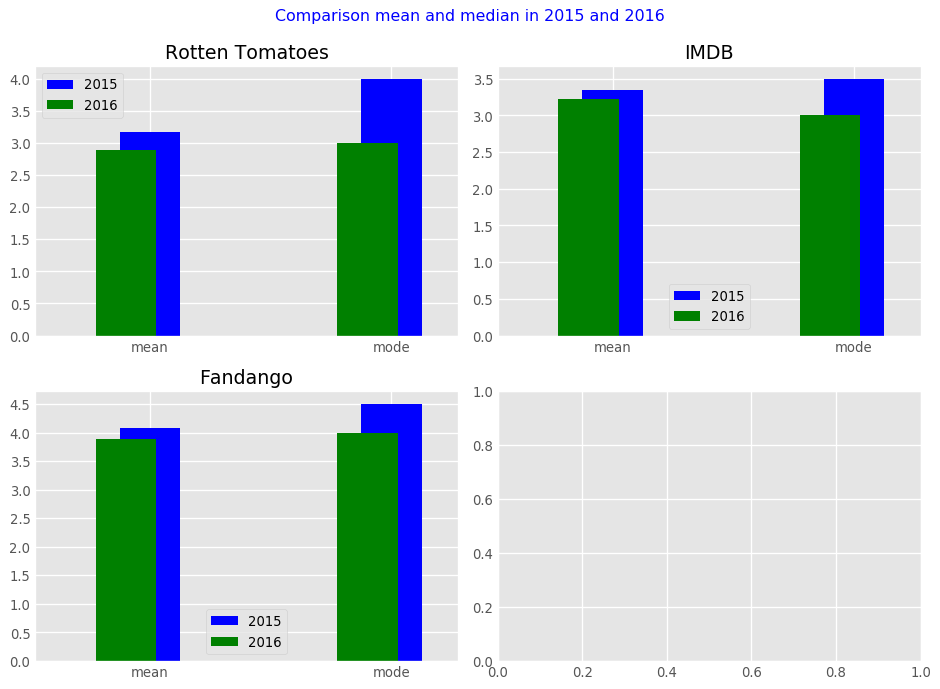

In [34]:
# figure style and subplot
plt.style.use('ggplot')
fig, ax = plt.subplots(2, 2, figsize=(10, 7), dpi= 95)
fig.suptitle('Comparison mean and median in 2015 and 2016', y=1.03, color= 'blue')

# plotting rotten tomatoes 
summary_others_RT['2015'].plot.bar(color= 'blue', label= '2015', legend= True, width= .25, ax= ax[0][0])
summary_others_RT['2016'].plot.bar(color= 'green', label= '2016',position= .9,rot=0, legend= True, width= .25, ax= ax[0][0])

# plotting IMDB
summary_others_IMDB['2015'].plot.bar(color= 'blue', label= '2015', legend= True, width= .25, ax= ax[0][1])
summary_others_IMDB['2016'].plot.bar(color= 'green', label= '2016', legend= True, position= .9, rot= 0, width= .25, ax= ax[0][1])

# plotting Fandango
summary.drop('median')['2015'].plot.bar(color= 'blue',label= '2015', legend= True, width= .25, ax= ax[1][0])
summary.drop('median')['2016'].plot.bar(color='green',label= '2016', legend= True, position= .9, rot= 0, width= .25, ax= ax[1][0])

# figure ornaments
ax[0][0].set_title("Rotten Tomatoes")
ax[0][1].set_title("IMDB")
ax[1][0].set_title('Fandango')
ax[1][0].set_yticks(np.arange(0,5,.5))

plt.tight_layout()

<font color= 'green'> **The bar graph for the maean and median shows the same trend as the distribution plot.** </font>

<font color= 'blue'>
    
# Conclusion

**My analysis shows that by looking at the data of Fandango in 2016, initially, it might seem they have fixed the bug algorithm but after comparing with the other widely accepted website it is worth saying that the rating for this website is still biased and dubious. Although there might be other cases to look into to become certain about this argument. We will work on that later on.**


# Thank you so much for spending time on my project  </font>